## Classifying 20 Newsgroups

In [ ]:
# Python Version - 3.6.1
# Platform - x86_64 Windows 7 Professional (64 Bit)

In [31]:
# We will be creating a supervised machine learning model to learn from given set of
# documents classified into 20 newsgroups. The model(s) created will be used to classify new
# documents into one of the 20 newsgroups and finally we will compare these models.

In [32]:
os.getcwd()

'/home/hdpuser/Srikanth/Pra'

In [74]:
# importing the required libraries
import os
import sys
import pandas as pd
import numpy as np
from time import time
%matplotlib inline
from sklearn.pipeline import Pipeline  # Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer  # Feature Extraction
from sklearn.naive_bayes import MultinomialNB  # Classifiers
from sklearn.linear_model import SGDClassifier  # Classifiers
from sklearn.metrics import classification_report, confusion_matrix  # Metrics
import scipy.sparse as sp
import matplotlib.pyplot as plt
from sklearn.datasets import load_files

## Loading the 20 News Groups Data

In [107]:
# Load the training and test sets
# load_files for directories of text files where the name of each directory is the name of each category and 
# each file inside of each directory corresponds to one sample from that category
print("Loading 20 newsgroups training and test sets... ")

# Note: load_files by default shuffles the dataset :)
train_bunch = load_files('newsbydate/train')
test_bunch = load_files('newsbydate/test')

print(len(train_bunch)) # 5
print(len(test_bunch)) # 5

t0 = time()
print("done in %fs" % (time() - t0))

Loading 20 newsgroups training and test sets... 
5
5
done in 0.000102s


In [108]:
train_bunch.keys() # dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [109]:
print(type(train_bunch.data)) # list
print(len(train_bunch.data)) # 11314
print(len(test_bunch.data)) # 7532

<class 'list'>
11314
7532


In [110]:
print('Description :',train_bunch.DESCR)
print("%d documents" % len(train_bunch.filenames)) # 11314 documents
print("%d categories" % len(train_bunch.target_names)) # 20 categories
print("\nCategories :")
for i,val in enumerate(train_bunch.target_names): # List of possible categories in dataset
    print(i, ' : ',val)

Description : None
11314 documents
20 categories

Categories :
0  :  alt.atheism
1  :  comp.graphics
2  :  comp.os.ms-windows.misc
3  :  comp.sys.ibm.pc.hardware
4  :  comp.sys.mac.hardware
5  :  comp.windows.x
6  :  misc.forsale
7  :  rec.autos
8  :  rec.motorcycles
9  :  rec.sport.baseball
10  :  rec.sport.hockey
11  :  sci.crypt
12  :  sci.electronics
13  :  sci.med
14  :  sci.space
15  :  soc.religion.christian
16  :  talk.politics.guns
17  :  talk.politics.mideast
18  :  talk.politics.misc
19  :  talk.religion.misc


In [111]:
print(train_bunch.target[:20])

[ 9  4 11  4  0  4  5  5 13 12 17 11 10  6  5 10  7  2 11  8]


In [112]:
type(train_bunch.data)

list

In [113]:
type(train_bunch.data[0]) # bytes

bytes

In [114]:
# Bag of Words
cvec = CountVectorizer()
data = map(lambda d : d.decode('utf-8','ignore'),
          train_bunch.data)
xtrain_counts = cvec.fit_transform(data)
xtrain_counts.shape # (11314, 130093)

(11314, 130093)

In [117]:
# Normalize occurance with Frequencies
tfidtrans = TfidfTransformer()
xtrain_tfid = tfidtrans.fit_transform(xtrain_counts)
xtrain_tfid.shape # (11314, 130093)

(11314, 130093)

## Predictive Modeling 

## Multinomial Naive Bayes Classifier

In [119]:
print("Building Pipeline with Multinomial Naive Bayes Classifier... ")

prinpclf = Pipeline([
    ('cvec',cvec),
    ('tfidtrans', tfidtrans),
    ('nbclf', MultinomialNB())
])

data = map(lambda d : d.decode('utf-8','ignore'),
          train_bunch.data)

pclf.fit(data, train_bunch.target)

t0 = time()
print("done in %fs" % (time() - t0))

Building Pipeline with Multinomial Naive Bayes Classifier... 
done in 0.000066s


In [46]:
print("Testing the data with Multinomial Naive Bayes Classifier... ")

testdata = map(lambda d : d.decode('utf-8','ignore'), 
               test_bunch.data)
preds = pclf.predict(testdata)

acc = np.mean(preds == test_bunch.target)
print('NB Prediction Accuracy :', acc) # NB Prediction Accuracy : 0.7738980350504514

creport = classification_report(test_bunch.target, preds, target_names=train_bunch.target_names)
print(creport)

nd = confusion_matrix(test_bunch.target, preds)
print( confusion_matrix(test_bunch.target, preds) )

Testing the data with Multinomial Naive Bayes Classifier... 
NB Prediction Accuracy : 0.7738980350504514
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84 

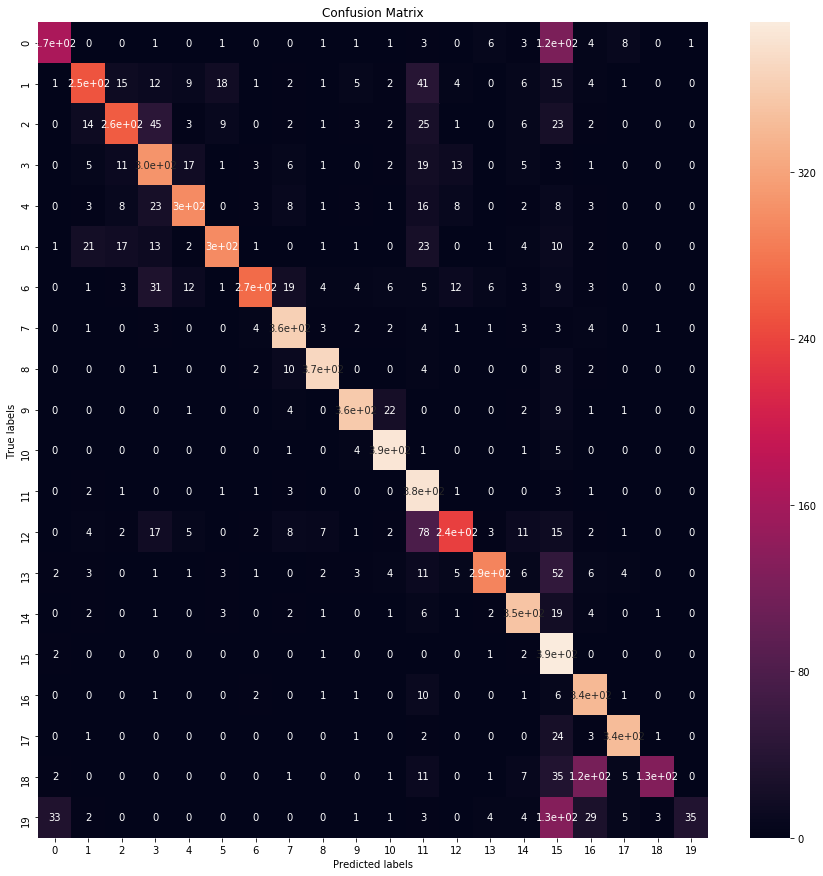

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,15))

ax= plt.subplot()
sns.heatmap(nd, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

## SVM Classifier

In [121]:
print("Building Pipeline with SVM Classifier... ")

svm_pclf = Pipeline([
    ('cvec',cvec),
    ('tfidtrans', tfidtrans),
    ('nbclf', SGDClassifier())
])

data = map(lambda d : d.decode('utf-8','ignore'),
          train_bunch.data)

svm_pclf.fit(data, train_bunch.target)

t0 = time()
print("done in %fs" % (time() - t0))

Building Pipeline with SVM Classifier... 


/home/hdpuser/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


done in 0.000065s


In [50]:
print("Testing the data with SVM Classifier... ")

testdata = map(lambda d : d.decode('utf-8','ignore'), 
               test_bunch.data)
preds = svm_pclf.predict(testdata)

acc = np.mean(preds == test_bunch.target)
print('SVM Prediction Accuracy :', acc) # NB Prediction Accuracy : 0.851035581518853

creport = classification_report(test_bunch.target, preds, target_names=train_bunch.target_names)
print(creport)

cm = confusion_matrix(test_bunch.target, preds)

print( confusion_matrix(test_bunch.target, preds) )

Testing the data with Multinomial Naive Bayes Classifier... 
NB Prediction Accuracy : 0.8505045140732873
                          precision    recall  f1-score   support

             alt.atheism       0.81      0.77      0.79       319
           comp.graphics       0.79      0.77      0.78       389
 comp.os.ms-windows.misc       0.75      0.73      0.74       394
comp.sys.ibm.pc.hardware       0.74      0.73      0.73       392
   comp.sys.mac.hardware       0.83      0.86      0.85       385
          comp.windows.x       0.86      0.77      0.82       395
            misc.forsale       0.84      0.91      0.87       390
               rec.autos       0.91      0.89      0.90       396
         rec.motorcycles       0.94      0.95      0.95       398
      rec.sport.baseball       0.90      0.95      0.93       397
        rec.sport.hockey       0.95      0.97      0.96       399
               sci.crypt       0.92      0.95      0.94       396
         sci.electronics       0.80 

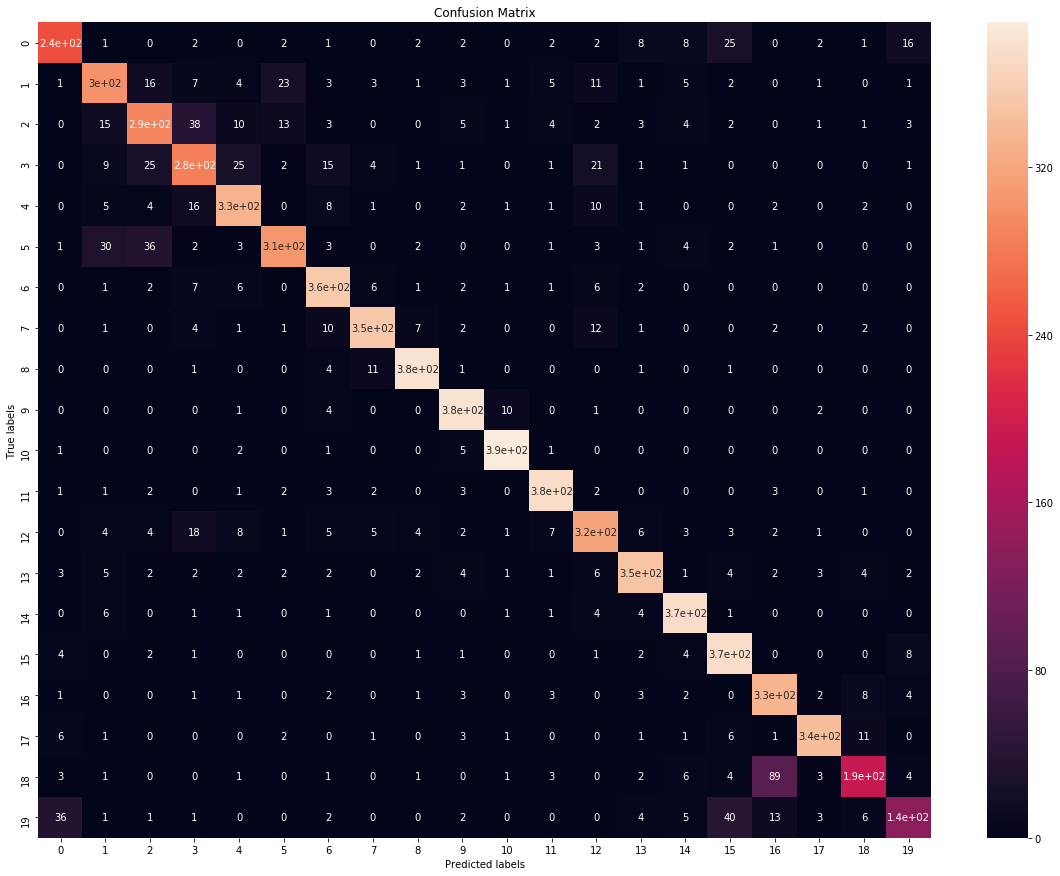

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,15))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');